#  <font color=green>Credit Card Fraud Detection Project</font>

Hello!

I am really excited about machine-learning and decided to take on this project as the first of many to get more comfortable the models used. 

This project covers credit card fraud and is meant to look at a dataset of transactions and predict whether it is fraudulent or not. I learned alot of this from 
Eduonix Learning Solutions. 

## Imports 

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

## Data Importing

In [2]:
path = 'creditcard.csv'

In [3]:
data = pd.read_csv(path)

## Exploring the Dataset

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
data.shape

(284807, 31)

In [8]:


# randomly selected 20% of the dataframe rows (fix the seed at 1)
df = data.copy() # storing this for later use
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(56961, 31)


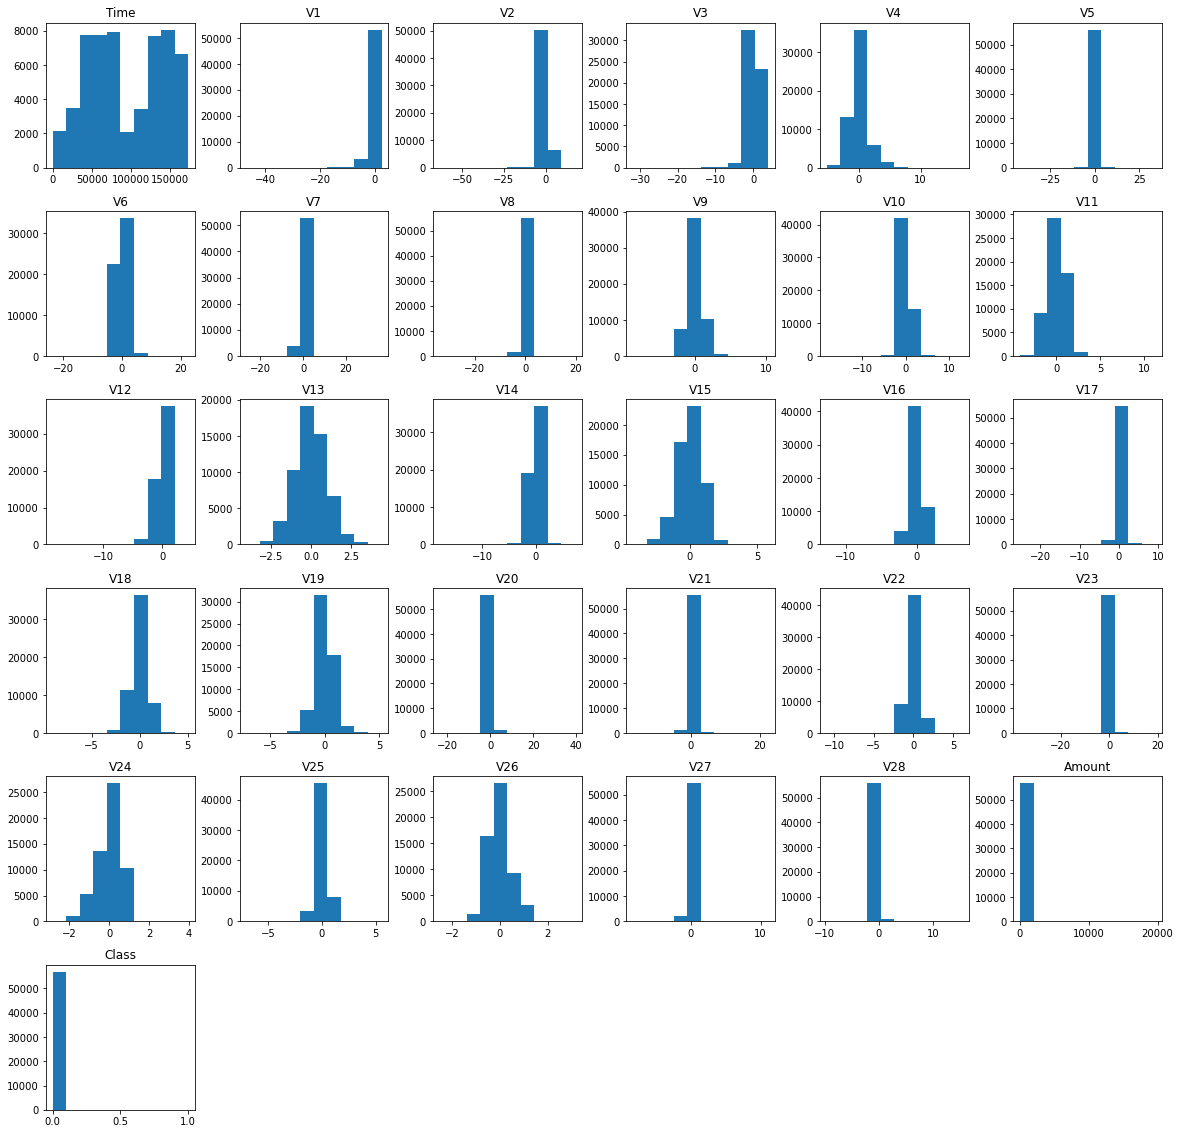

In [9]:
# plot the histogram of each parameter
data.hist(figsize = (20, 20),grid=False)
plt.show()

You can see most of the V's are clustered around 0 with some or no outliers. Notice we have very few fraudulent cases over valid cases in our class histogram.

In [10]:
# determine the number of fraud cases


def compute_outlier_fraction(data):
    fraud = data[data['Class'] == 1]
    valid = data[data['Class'] == 0]
    outlier_fraction = len(fraud) / float(len(valid))
    return outlier_fraction
    

# percentage_fraud = (len(fraud) / len(data) ) *100
outlier_fraction = compute_outlier_fraction(data)
# print(f'Percentage fraud : {percentage_fraud} %\n')
print(f'Outlier_fraction : {outlier_fraction}')

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Cases: {len(valid)}')

Outlier_fraction : 0.0015296972254457222
Fraud Cases: 87
Valid Cases: 56874


## Visualization of features

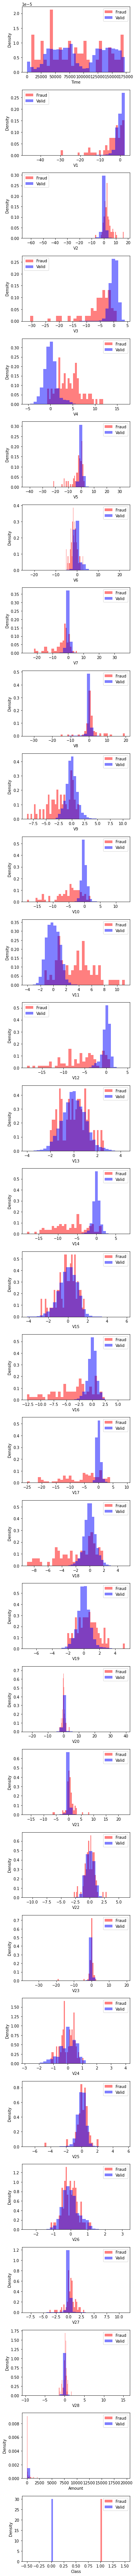

In [11]:
import matplotlib.pyplot as plt

def compare_histograms(a, b):
    """Plots histograms of each feature in DataFrames a and b on the same axes."""
    
    # List of columns with 'numerical values' only
    features = a.select_dtypes(include=['number']).columns

    # Create subplots
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(5, 3 * len(features)))
 
 

    # Loop through each feature and plot histograms
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.hist(a[feature], bins=30, color='red', alpha=0.5, label='Fraud', density=True)
        ax.hist(b[feature], bins=30, color='blue', alpha=0.5, label='Valid', density=True)
        
        ax.set_xlabel(feature)
        ax.set_ylabel("Density")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function to compare histograms
compare_histograms(fraud, valid)


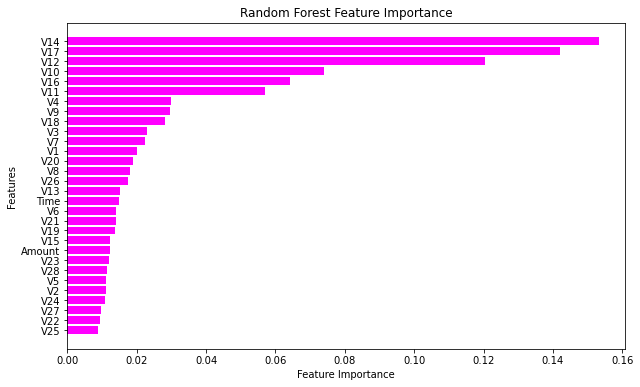

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define X and Y


# Training Dataframe
X = data.drop(columns='Class')

# Target ( i.e 'Class')
Y = data['Class']

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, Y)

# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display results
# print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],color='magenta')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()


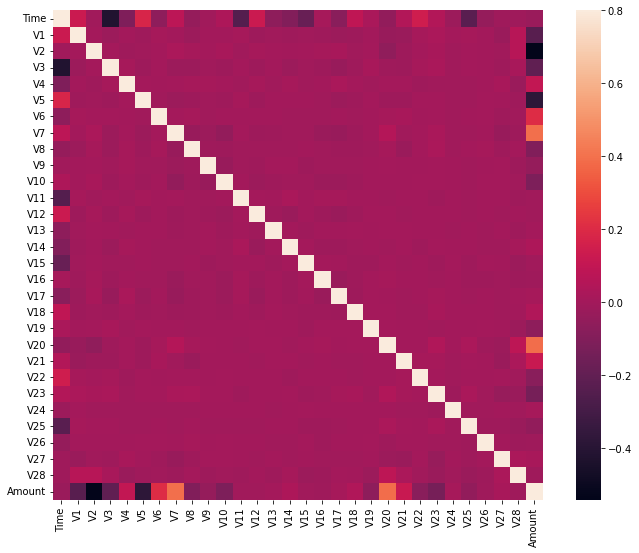

In [13]:

'''Recall that in supervised learning, the label is a target not a feature
Thus I will drop the 'Class' column when plotting the correlation matrix '''
# correlation matrix
corrmat = data.drop(columns=['Class']).corr()  #
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

You can see a lot of the values are close to 0 . Most of them are fairly unrelated. The lighter squares signify a stronger correlation. 

## Organizing the Data

In [14]:
'''Since, as mentioned 'Class' is a target, we drop it when training (For X) '''

# Training Dataframe
X = data.drop(columns='Class')

# Target ( i.e 'Class')
Y = data['Class']

print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [15]:
X.columns # To confirm 'Class' is absent from our features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

#  <font color=red>Applying Algorithms (Machine Learning)</font>

In [21]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# First, a function that will allow an ouput dataframe for plotting

In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix


def create_verdict_dataframe(X, Y, y_pred):
    """
    Creates a DataFrame containing training features and a 'verdict' column 
    that classifies each transaction as TN, TP, FN, or FP.

    Parameters:
    - X: Feature DataFrame used for training
    - Y: Actual labels (0 = valid, 1 = fraud)
    - y_pred: Model predictions (0 = valid, 1 = fraud)

    Returns:
    - DataFrame with all features and a new 'verdict' column
    """
    
    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()

    # Define verdict labels for each row
    def get_verdict(actual, predicted):
        if actual == 1 and predicted == 1:
            return "TP"  # True Positive (Correctly detected fraud)
        elif actual == 1 and predicted == 0:
            return "FN"  # False Negative (Missed fraud)
        elif actual == 0 and predicted == 1:
            return "FP"  # False Positive (Normal wrongly flagged as fraud)
        else:
            return "TN"  # True Negative (Correctly classified as normal)

    # Create DataFrame with predictions and actual labels
    df_result = X.copy()
    df_result['Actual'] = Y
    df_result['Predicted'] = y_pred
    df_result['Verdict'] = [get_verdict(a, p) for a, p in zip(Y, y_pred)]

    return df_result




# A function that will visualize the outliers on a scattered plot for dominant features

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fraud_detection(df_verdict, feature1='V14', feature2='V17'):
    """
    Creates side-by-side scatter plots for fraud detection based on two selected features.
    
    Parameters:
    - df_verdict: DataFrame containing transaction data with a 'Verdict' column
    - feature1: First feature to visualize on the y-axis
    - feature2: Second feature to visualize on the y-axis
    """
    
    # Mapping verdicts to colors
    color_map = {"TP": "red", "FP": "yellow", "TN": "green", "FN": "black"}
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

    # Scatter plot for Feature 1
    sns.scatterplot(x=df_verdict.index, y=df_verdict[feature1], hue=df_verdict['Verdict'], 
                    palette=color_map, s=50, ax=axes[0])
    axes[0].set_title(f'Visualization of {feature1}')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel(feature1)
    axes[0].legend(title='Verdict', loc='best')

    # Scatter plot for Feature 2
    sns.scatterplot(x=df_verdict.index, y=df_verdict[feature2], hue=df_verdict['Verdict'], 
                    palette=color_map, s=50, ax=axes[1])
    axes[1].set_title(f'Visualization of {feature2}')
    axes[1].set_xlabel('Index')
    axes[1].set_ylabel(feature2)
    axes[1].legend(title='Verdict', loc='best')

    # Show the plot
    plt.show()




In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from termcolor import colored




# The ML function

def run_ml(X, Y, outlier_fraction, state=1):
    
    # A pre-legend/explanation
    print(colored("True Positive (TP)", "red") + "  : Case correctly identified as fraud")
    print(colored("False Positive (FP)", "yellow") + " : Normal transaction incorrectly flagged as fraud")
    print(colored("True Negative (TN)", "green") + "  : Normal transaction correctly classified as valid")
    print(colored("False Negative (FN)", "grey") + " : Fraud case missed and classified as normal\n")
    print('-' * 80)
    print('-' * 80)
    
    classifiers = {
        'Isolation Forest': IsolationForest(max_samples=len(X),  
                                           contamination=outlier_fraction,  
                                           random_state=state),
        'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction),
        'Support Vector Machine (SVM)': OneClassSVM(kernel='rbf', nu=0.005, gamma='scale')
    }

    for clf_name, clf in list(classifiers.items())[::-1]:
        
        if clf_name == 'Support Vector Machine (SVM)':
            scaler = StandardScaler()  # SVM requires feature scaling
            X_scaled = scaler.fit_transform(X)
            clf.fit(X_scaled)
            y_pred = clf.predict(X_scaled)

        elif clf_name == 'Local Outlier Factor':
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_

        else:  # Isolation Forest
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)

        # 🔹 Convert predictions: 1 → 0 (valid), -1 → 1 (fraud)
        y_pred = np.where(y_pred == 1, 0, 1)

        # 🔹 Create the DataFrame with verdict labels
        df_verdict = create_verdict_dataframe(X, Y, y_pred)

        # 🔹 Plot results
        plot_fraud_detection(df_verdict)

        # 🔹 Compute classification report once
        report = classification_report(Y, y_pred, output_dict=True)

        # Extract key metrics
        fraud_recall = report['1']['recall'] * 100   # % of fraud correctly identified
        fraud_precision = report['1']['precision'] * 100  # % of flagged fraud actually fraud
        fraud_f1 = report['1']['f1-score'] * 100  # F1 score for fraud detection
        false_negatives = 100 - fraud_recall  # Fraud cases missed

        # 🔹 Correct False Positive Rate calculation
        tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()
        false_positive_rate = (fp / (fp + tn)) * 100  # Normal cases wrongly flagged as fraud

        # Print performance metrics
        print(f'The model {clf_name} has {np.sum(y_pred != Y)} errors')
        print(f'Accuracy: {accuracy_score(Y, y_pred) * 100:.4f} %\n')
        print(classification_report(Y, y_pred))
        print(f"{fraud_recall:.3f}% of fraud cases were accurately identified as fraud.")
        print(f"{false_negatives:.3f}% of fraud cases were missed.")
        print(f"{false_positive_rate:.3f}% of normal transactions were incorrectly flagged as fraud.")
        print('-' * 80)


## Fit the Model

True Positive (TP)  : Case correctly identified as fraud
False Positive (FP) : Normal transaction incorrectly flagged as fraud
True Negative (TN)  : Normal transaction correctly classified as valid
False Negative (FN) : Fraud case missed and classified as normal

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


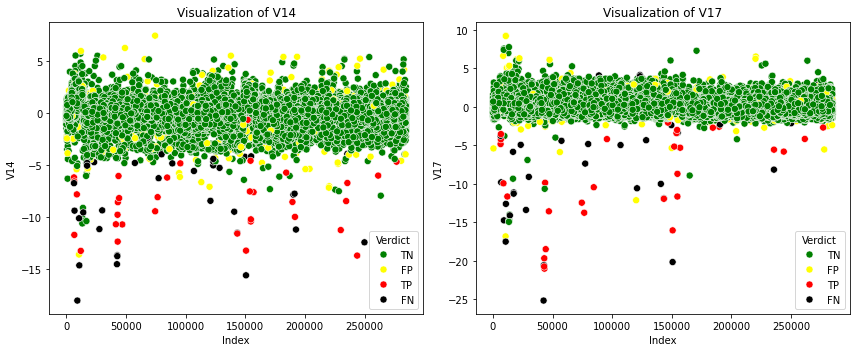

The model Support Vector Machine (SVM) has 611 errors
Accuracy: 98.9273 %

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56874
           1       0.06      0.39      0.10        87

    accuracy                           0.99     56961
   macro avg       0.53      0.69      0.55     56961
weighted avg       1.00      0.99      0.99     56961

39.080% of fraud cases were accurately identified as fraud.
60.920% of fraud cases were missed.
0.981% of normal transactions were incorrectly flagged as fraud.
--------------------------------------------------------------------------------


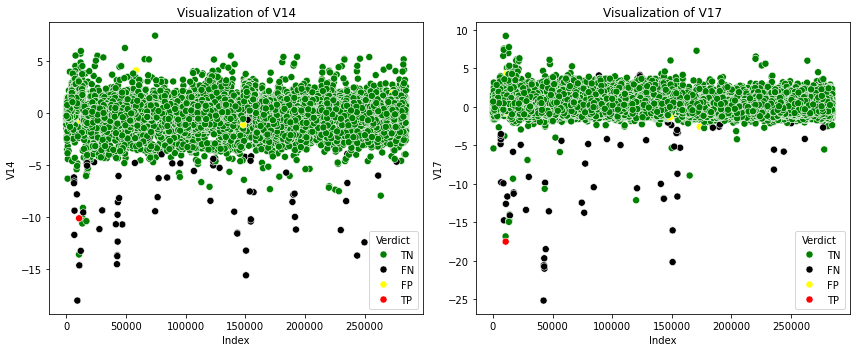

The model Local Outlier Factor has 173 errors
Accuracy: 99.6963 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

1.149% of fraud cases were accurately identified as fraud.
98.851% of fraud cases were missed.
0.153% of normal transactions were incorrectly flagged as fraud.
--------------------------------------------------------------------------------


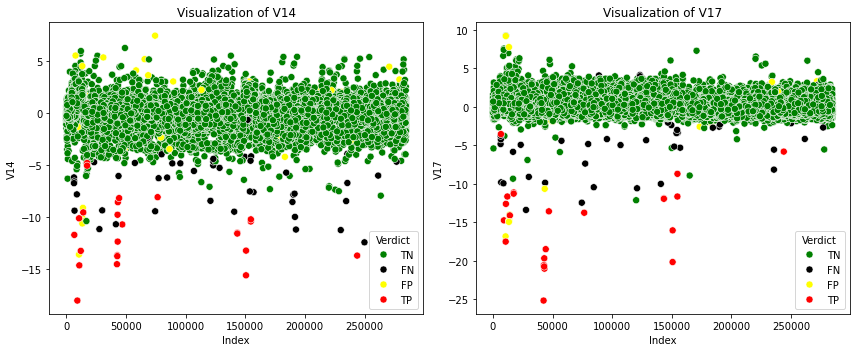

The model Isolation Forest has 127 errors
Accuracy: 99.7770 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

27.586% of fraud cases were accurately identified as fraud.
72.414% of fraud cases were missed.
0.113% of normal transactions were incorrectly flagged as fraud.
--------------------------------------------------------------------------------


In [27]:
run_ml(X,Y,outlier_fraction)

Looking at precision for fraudulent cases (1) lets us know the percentage of cases that are getting correctly labeled. 'Precision' accounts for false-positives. 'Recall' accounts for false-negatives. Low numbers could mean that we are constantly calling clients asking them if they actually made the transaction which could be annoying.

Goal: To get better percentages.

Our Isolation Forest method (which is Random Forest based) was able to produce a better result. Looking at the f1-score 26% (or approx. 30%) of the time we are going to detect the fraudulent transactions.

#  <font color=blue>Optimizing models : Using less features of higher importance</font>

In [28]:
# first reducing the features

reduced_features = ['V12','V14', 'V11', 'V17', 'V10', 'V16' ,'V9', 'V18']

new_sample = df.sample(frac = 0.2, random_state = 2)

of_reduced = compute_outlier_fraction(new_sample)

X_reduced = new_sample [reduced_features]

Y_reduced = new_sample['Class']

print(X_reduced.shape)
print(Y_reduced.shape)

(56961, 8)
(56961,)


True Positive (TP)  : Case correctly identified as fraud
False Positive (FP) : Normal transaction incorrectly flagged as fraud
True Negative (TN)  : Normal transaction correctly classified as valid
False Negative (FN) : Fraud case missed and classified as normal

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


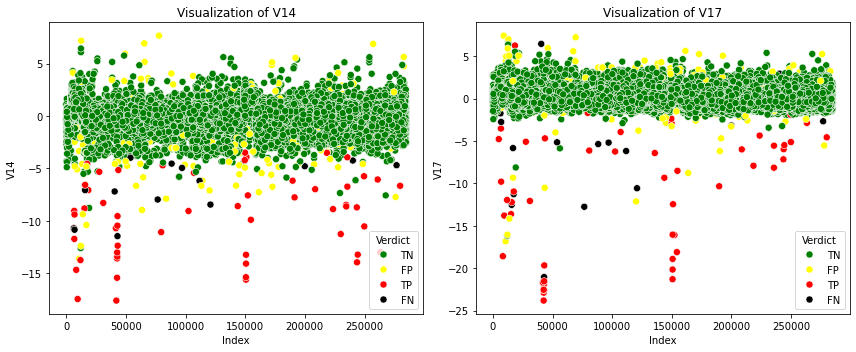

The model Support Vector Machine (SVM) has 305 errors
Accuracy: 99.4645 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.17      0.69      0.28        84

    accuracy                           0.99     56961
   macro avg       0.59      0.84      0.64     56961
weighted avg       1.00      0.99      1.00     56961

69.048% of fraud cases were accurately identified as fraud.
30.952% of fraud cases were missed.
0.491% of normal transactions were incorrectly flagged as fraud.
--------------------------------------------------------------------------------


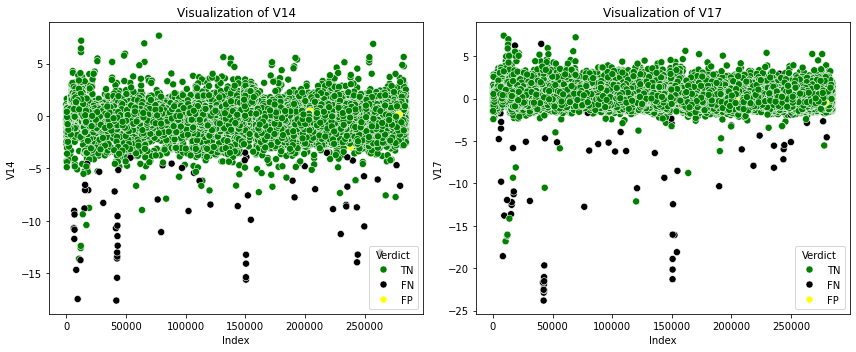

The model Local Outlier Factor has 169 errors
Accuracy: 99.7033 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.00      0.00      0.00        84

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

0.000% of fraud cases were accurately identified as fraud.
100.000% of fraud cases were missed.
0.149% of normal transactions were incorrectly flagged as fraud.
--------------------------------------------------------------------------------


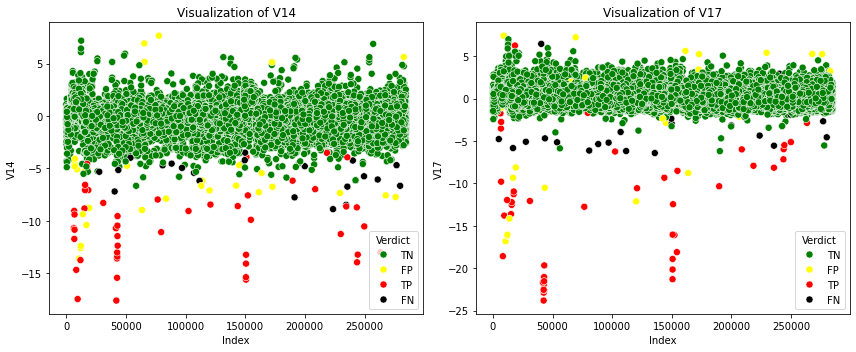

The model Isolation Forest has 69 errors
Accuracy: 99.8789 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.59      0.60      0.59        84

    accuracy                           1.00     56961
   macro avg       0.79      0.80      0.80     56961
weighted avg       1.00      1.00      1.00     56961

59.524% of fraud cases were accurately identified as fraud.
40.476% of fraud cases were missed.
0.062% of normal transactions were incorrectly flagged as fraud.
--------------------------------------------------------------------------------


In [29]:
run_ml(X_reduced,Y_reduced,of_reduced)

# In this project, we focused on using "class" as our target feature because it simplifies the classification of fraudulent and valid transactions. We employed feature importance analysis to identify the most relevant features for our models, selecting the most impactful ones for optimization. Our results indicate that the Support Vector Machine (SVM) consistently outperformed the other models, both before and after optimization, while the Local Outlier Factor (LOF) exhibited the weakest performance. Interestingly, we observed that the LOF model is particularly effective at identifying normal transactions. This raises an important question: Is this behavior driven by the hyperparameters we used or by the selected features? Further investigation is required to determine the underlying cause. 